In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
matplotlib.rc_file('matplotlibrcGl')
OD = open('pUC-pTet-growth.csv','r') 

def parse(file):
    results = []
    for i in range(0,6):
        results.append([])
        for j in range(0,10):
            results[i].append([])
    for line in file:
        l = line.strip().split(',')
        for i in range(0,60):
            results[i%6][int(i/6)].append(float(l[i])-0.084)
    return results
ODs = parse(OD)

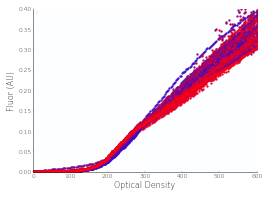

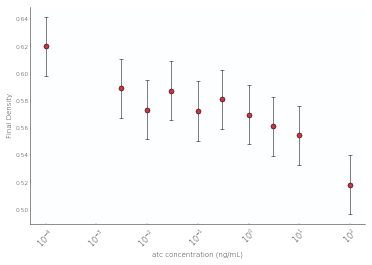

In [58]:
fig,ax = plt.subplots(figsize=(4,3))
atcConc = [100,10,3,1,0.3,0.1,0.03,0.01,0.003,0.0001]
pcn = [49.6363636363636,40.921052631579,42.5,46.1290322580645,32.8358208955224,11.2641509433962,7,2.8433734939759,(2.1),1.46987951807229]
time = np.arange(0,3*len(ODs[0][0]),3)
colors = ['#000fff','#150eeb','#2b0cd7','#400bc3','#550aaf','#6a099b','#800887','#950673','#aa055f','#bf044b','#d40237','#ea0123','#ff000f']
b = np.zeros((6,10))
density,dsd = np.zeros(10),np.zeros(10)
for i in range(0,6,1):
    for j in range(0,10):
        a = np.zeros(len(ODs[i][j]))
        #for k in range(0,len(ODs[i][j])):
            #a[k] = np.mean([ODs[i][j][k],ODs[i+1][j][k],ODs[i+2][j][k],ODs[i+3][j][k],ODs[i+4][j][k],ODs[i+5][j][k]])
        ax.plot(time,ODs[i][j],'o',color = colors[3:][j]) #label=str(pcn[j])[0:4]
        b[i][j] = max(ODs[i][j])
        
for i in range(0,len(b.transpose())):
    density[i] = np.mean(b.transpose()[i])
    dsd = np.std(b.transpose()[i])
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend()
ax.set_ylim([0,0.4])
ax.set_xlim([1,600])
ax.set_xlabel('Optical Density', fontsize = 8)
ax.set_ylabel('Fluor (AU)', fontsize=8)
fig,ax = plt.subplots()
ax.errorbar(atcConc,density,yerr=dsd,fmt='o',ms=5,mew=0.5,mec='black',ecolor='black',capsize=2)
plt.xticks([100,10,3,1,0.3,0.1,0.03,0.01,0.003,0.0001],['100','10','3','1','0.3','0.1','0.03','0.01','0.003','0'], rotation = 45, fontsize=8)
ax.set_xlabel('atc concentration (ng/mL)')
ax.set_ylabel('Final Density')
ax.set_xscale('log')

[[64. 62. 62. 62. 61. 62. 62. 62. 62. 62.]
 [64. 63. 61. 62. 61. 62. 62. 61. 61. 60.]
 [65. 62. 62. 62. 61. 62. 61. 61. 62. 61.]
 [64. 62. 62. 61. 61. 62. 61. 61. 60. 61.]
 [64. 62. 62. 55. 61. 61. 61. 61. 60. 62.]
 [65. 61. 61. 60. 60. 60. 62. 60. 60. 61.]]
[[72. 70. 72. 72. 70. 79. 79. 72. 69. 79.]
 [73. 71. 69. 71. 72. 70. 69. 72. 78. 70.]
 [72. 72. 70. 69. 69. 72. 72. 70. 73. 72.]
 [73. 72. 72. 72. 68. 79. 70. 72. 70. 73.]
 [72. 72. 70. 79. 68. 70. 72. 70. 67. 72.]
 [73. 69. 79. 72. 70. 70. 79. 67. 72. 71.]]


Text(0,0.5,'Lag Time (min)')

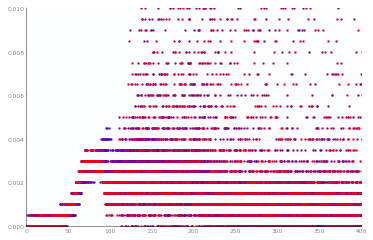

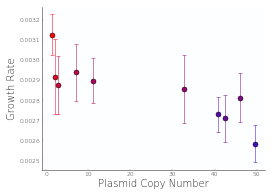

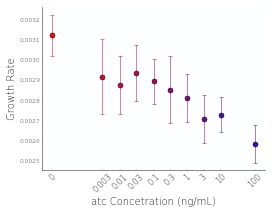

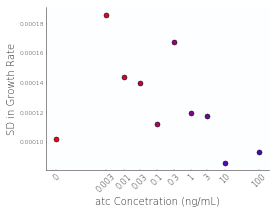

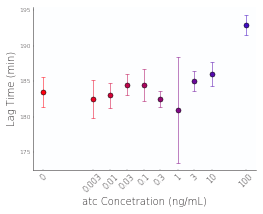

In [74]:
GRarr = np.zeros((6,10,len(ODs[0][0])))
time = np.arange(0,len(ODs[0][0]))
c= np.zeros((6,10,len(ODs[0][0])))
fig,ax = plt.subplots()
colors = ['#000fff','#150eeb','#2b0cd7','#400bc3','#550aaf','#6a099b','#800887','#950673','#aa055f','#bf044b','#d40237','#ea0123','#ff000f']
for i in range(0,6):
    for j in range(0,10):
        for k in range(0,len(ODs[i][j])-1):
            GRarr[i][j][k] = (((ODs[i][j][k+1] - ODs[i][j][k]))+(ODs[i][j][k] - ODs[i][j][k-1]))/2 #Central Difference to calculate growth rate
        ax.plot(time[0:len(GRarr[i][j])],GRarr[i][j], 'o',color = colors[3:][j])
ax.set_xlim([0,400])
ax.set_ylim([0,0.01])
tmax = np.zeros((6,10))
tlag = np.zeros((6,10))
for i in range(0,6,1):
    for j in range(0,10):
        for k in range(0,300):
            if ODs[i][j][k] >0.02:
                tlag[i][j] = k #Find time of maximum growth rate for each well
                break
print(tlag)
for i in range(0,6,1):
    for j in range(0,10):
        for k in range(0,80):
            if GRarr[i][j][k] >= max(GRarr[i][j][k+1:81]) and GRarr[i][j][k] >= max(GRarr[i][j][:80]):
                tmax[i][j] = k #Find time of maximum growth rate for each well
                break
print(tmax)
growthRate = np.zeros((6,10))
flu = np.zeros((6,10))
for i in range(0,6,1):
    for j in range(0,10):
        f = int(tmax[i][j])
        growthRate[i][j] = np.mean(GRarr[i][j][f-2:f+2]) #Average growth rate over small window around maximum
#print(growthRate)
fig,ax = plt.subplots(figsize=(4,3))
a = []
for i in range(0,10):
    ax.errorbar([pcn[i]],np.mean(np.transpose(growthRate)[i]),yerr=np.std(np.transpose(growthRate)[i]),fmt='o',ms=5,mew=0.5,mec='black', color = colors[3:][i],capsize=2)
    a.append(np.mean(np.transpose(growthRate)[i]))#Divide GR by GR of 0 atc condition, this looks better if plotted against aTc concentration
ax.set_xlabel('Plasmid Copy Number', fontsize=10)
ax.set_ylabel('Growth Rate',fontsize=10)
fig,ax = plt.subplots(figsize=(4,3))
a = []
for i in range(0,10):
    ax.errorbar([atcConc[i]],np.mean(np.transpose(growthRate)[i]),yerr=np.std(np.transpose(growthRate)[i]),fmt='o',ms=5,mew=0.5,mec='black', color = colors[3:][i],capsize=2)
    a.append(np.mean(np.transpose(growthRate)[i]))#Divide GR by GR of 0 atc condition, this looks better if plotted against aTc concentration
ax.set_xscale('log') 
plt.xticks([100,10,3,1,0.3,0.1,0.03,0.01,0.003,0.0001],['100','10','3','1','0.3','0.1','0.03','0.01','0.003','0'], rotation = 45, fontsize=8)
ax.set_xlabel('atc Concetration (ng/mL)', fontsize=10)
ax.set_ylabel('Growth Rate',fontsize=10)
fig.savefig('pUC-pTet-Growth-rate.png')
fig,ax = plt.subplots(figsize=(4,3))
a = []
for i in range(0,10):
    ax.plot([atcConc[i]],np.std(np.transpose(growthRate)[i]),'o',ms=5,mew=0.5,mec='black', color = colors[3:][i])
    #a.append(np.mean(np.transpose(growthRate)[i]))#Divide GR by GR of 0 atc condition, this looks better if plotted against aTc concentration
ax.set_xscale('log') 
plt.xticks([100,10,3,1,0.3,0.1,0.03,0.01,0.003,0.0001],['100','10','3','1','0.3','0.1','0.03','0.01','0.003','0'], rotation = 45, fontsize=8)
ax.set_xlabel('atc Concetration (ng/mL)', fontsize=10)
ax.set_ylabel('SD in Growth Rate',fontsize=10)
fig.savefig('grSD.png')
fig,ax = plt.subplots(figsize=(4,3))
a = []
for i in range(0,10):
    ax.errorbar([atcConc[i]],np.mean(np.transpose(tlag)[i])*3,yerr=np.std(np.transpose(tlag)[i])*3,fmt='o',ms=5,mew=0.5,mec='black', color = colors[3:][i],capsize=2)
    a.append(np.mean(np.transpose(growthRate)[i]))#Divide GR by GR of 0 atc condition, this looks better if plotted against aTc concentration
ax.set_xscale('log') 
plt.xticks([100,10,3,1,0.3,0.1,0.03,0.01,0.003,0.0001],['100','10','3','1','0.3','0.1','0.03','0.01','0.003','0'], rotation = 45, fontsize=8)
ax.set_xlabel('atc Concetration (ng/mL)', fontsize=10)
ax.set_ylabel('Lag Time (min)',fontsize=10)